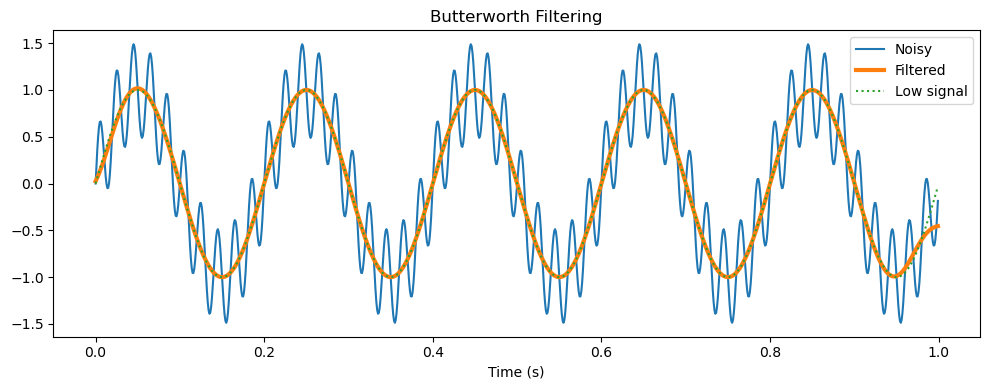

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
low_freq = np.sin(2*np.pi*5*t)  # 5 Hz 
high_freq = 0.5*np.sin(2*np.pi*50*t)  # 50 Hz noise
signal = low_freq + high_freq

# Butterworth low-pass filter
nyq = 0.5 * fs
cutoff = 15  # Hz
b, a = butter(4, cutoff/nyq, btype='low')
filtered = filtfilt(b, a, signal)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t, signal, label='Noisy')
plt.plot(t, filtered, label='Filtered', linewidth=3)
plt.plot(t, low_freq, label='Low signal', linestyle=':')
plt.title('Butterworth Filtering')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()

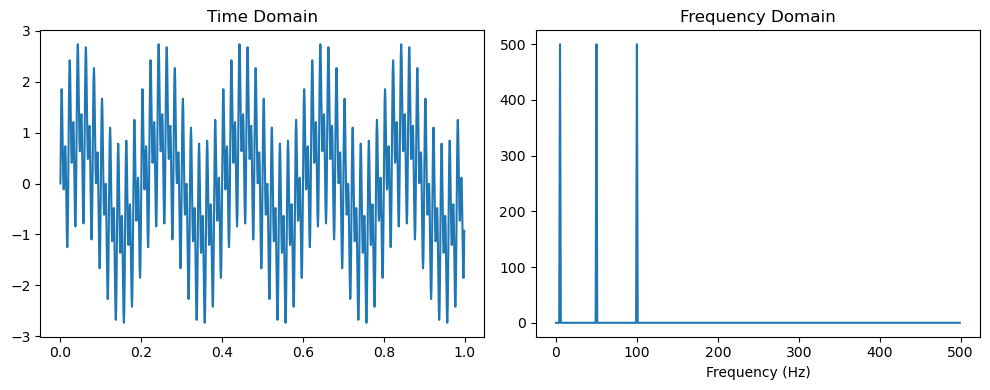

In [2]:
from scipy.fft import fft, fftfreq

# Generate signal
freqs = [5, 50, 100]
signal = sum(np.sin(2*np.pi*f*t) for f in freqs)

# Compute FFT
N = len(signal)
yf = fft(signal)[:N//2]
xf = fftfreq(N, 1/fs)[:N//2]

# Plot
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(t, signal)
plt.title('Time Domain')
plt.subplot(122)
plt.plot(xf, np.abs(yf))
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()